# AI Comparisons

This notebook is for comparing the different AIs by letting them compete against each other.

<b style="background-color:yellow; color:blue">TODO!!!!!</b>

In [ ]:
%run Core.ipynb

# Test Scout

In [ ]:
%%time

gCounts = 0
gCache = {}
Cache = {}
Minimax("Minimax",5,0).choose_house(gStartState)
print(gCounts)

3301
CPU times: user 689 ms, sys: 3.71 ms, total: 692 ms
Wall time: 1.52 s


In [ ]:
%%time
gCounts = 0

game = Kalah_Game([Scout("Scout",3), Minimax("Mini",3)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)
print(gCounts)

Mini wins!
[[0, 0, 0, 0, 0, 0, 13], [8, 1, 0, 0, 1, 0, 25]]
11367
CPU times: user 609 ms, sys: 630 µs, total: 610 ms
Wall time: 616 ms


In [ ]:
game = Kalah_Game([Minimax("Mini",3), Scout("Scout",3)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

Mini wins!
[[3, 0, 0, 0, 0, 0, 27], [0, 0, 0, 0, 0, 0, 18]]


## Tests Minimax 

In this section we are executing the following tests:

- Random AI plays against Minimax AI
- Two Minimax AI's play against each other with different limits

### Test: Random_AI vs. Minimax

In this test the Random AI and the Minimax AI are playing against each other 100 times. The Random AI is the beginner for 50 games and the Minimax AI is the beginner for 50 games.

In [ ]:
%%time

limit = 2
mini_wins = 0
rando_wins = 0

for seed in range(50):
    game1 = Kalah_Game([Random_AI("Rando",seed), Minimax("Mini",limit)],0)
    game1.start()
    won1 = utility(game1.state, 0)
    
    # print("")
    # game1.show_state() 
    if(won1 == 1):
        # print(f"{game1.players[0]} wins!")
        rando_wins += 1
    elif(won1 == -1):
        # print(f"{game1.players[1]} wins!")
        mini_wins += 1
    else:
        # print(f"Draw!")
        pass
        
    ############################
    
    game2 = Kalah_Game([Minimax("Mini",limit), Random_AI("Rando",seed)],0)
    game2.start()
    won2 = utility(game2.state, 0)


    if(won2 == 1):
        # print(f"{game2.players[0]} wins!")
        mini_wins += 1
    elif(won2 == -1):
        # print(f"{game2.players[1]} wins!")
        rando_wins += 1
    else:
        # print(f"Draw!")
        pass
            
print(f"Rando won {rando_wins} times and Mini won {mini_wins} times!")

Rando won 0 times and Mini won 100 times!
CPU times: user 1.77 s, sys: 50.1 ms, total: 1.82 s
Wall time: 1.82 s


As expected the Minimax AI wins every time. 

### Test: Minimax vs. Minimax with limit 2 and 3

In this test two Minimax AI's with different limits are competing

In [ ]:
%%time

limit = 4
mima_low = 0
mima_high = 0

for i in range(50):
    game1 = Kalah_Game([Minimax("Mima_high",limit), Minimax("Mima_low",limit-2)],0)
    game1.start()
    won1 = utility(game1.state, 0)
    
    # print("")
    # game1.show_state() 
    if(won1 == 1):
        # print(f"{game1.players[0]} wins!")
        mima_high += 1
    elif(won1 == -1):
        # print(f"{game1.players[1]} wins!")
        mima_low += 1
    else:
        # print(f"Draw!")
        pass
        
    ############################
    
    game2 = Kalah_Game([Minimax("Mima_low",limit-2), Minimax("Mima_high",limit)],0)
    game2.start()
    won2 = utility(game2.state, 0)


    if(won2 == 1):
        # print(f"{game2.players[0]} wins!")
        mima_low += 1
    elif(won2 == -1):
        # print(f"{game2.players[1]} wins!")
        mima_high += 1
    else:
        # print(f"Draw!")
        pass
            
print(f"Mima_low won {mima_low} times and Mima_high won {mima_high} times!")

Mima_low won 0 times and Mima_high won 100 times!
CPU times: user 5.73 s, sys: 22.8 ms, total: 5.75 s
Wall time: 5.75 s


Bei Limitunterschied von 1 ist es ausgeglichen (je nachdem, wer beginnt). Bei Limitunterschied von mehr als 2 gewinnt immer Mima_high.

## Tests: Alpha-Beta

In this section we are executing the following tests:

- computation time for Minimax AI and AlphaBeta AI
- Minimax AI plays against AlphaBeta AI with same and different limits
- Minimax AI plays against AlphaBeta AI with different beginner

### computation time: Minimax vs. AlphaBeta

In this tests two AI's with the same limit are playing against each other for the Minimax AI and the AlphaBeta AI to compare the comptutation time of a game.

In [ ]:
%%time
game = Kalah_Game([Minimax("Mima_1",4), Minimax("Mima_2",4)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

Mima_2 wins!
[[0, 0, 0, 0, 0, 0, 23], [1, 0, 0, 2, 11, 0, 11]]
CPU times: user 3.42 s, sys: 19.6 ms, total: 3.44 s
Wall time: 3.45 s


In [ ]:
%%time
game = Kalah_Game([AlphaBeta("Ab_first",4), AlphaBeta("Ab_second",4)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

Ab_first wins!
[[0, 1, 2, 1, 0, 3, 24], [0, 0, 0, 0, 0, 0, 17]]
CPU times: user 2.48 s, sys: 12 ms, total: 2.49 s
Wall time: 2.49 s


As expected the AlphaBeta AI's are faster than the Minimax AI's.

### Test: Minimax vs. AlphaBeta

The two AI's Minimax and AlphaBeta are competing against each other with different limits.

In [ ]:
testlimit = 3
game = Kalah_Game([AlphaBeta("AB",testlimit+2), Minimax("Mini",testlimit)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

AB wins!
[[0, 0, 0, 0, 0, 5, 27], [0, 0, 0, 0, 0, 0, 16]]


In [ ]:
testlimit = 4
game = Kalah_Game([Minimax("Mini",testlimit),AlphaBeta("AB",testlimit)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

AB wins!
[[0, 0, 0, 0, 0, 0, 23], [1, 0, 0, 2, 11, 0, 11]]


With the same limit the first Player wins. 

In [ ]:
%%time
game = Kalah_Game([Minimax("Mini",5), AlphaBeta("AlphaBeta",5)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

AlphaBeta wins!
[[0, 0, 0, 0, 0, 0, 17], [1, 1, 11, 0, 0, 1, 17]]
CPU times: user 44.6 ms, sys: 3 µs, total: 44.6 ms
Wall time: 44.2 ms


### Test: Minimax vs. AlphaBeta with different beginner

In [ ]:
%%time

limit = 3
mini_wins = 0
alphabeta_wins = 0

for seed in range(20):
    #print(seed)
    game1 = Kalah_Game([AlphaBeta("AlphaBeta", limit+1, seed), Minimax("Mini", limit, seed)],0)
    game1.start()
    won1 = utility(game1.state, 0)
    
    # print("")
    # game1.show_state() 
    if(won1 == 1):
        # print(f"{game1.players[0]} wins!")
        alphabeta_wins += 1
    elif(won1 == -1):
        # print(f"{game1.players[1]} wins!")
        mini_wins += 1
    else:
        #print(f"Draw!")
        pass
        
    ############################
    
    game2 = Kalah_Game([Minimax("Mini", limit, seed), AlphaBeta("AlphaBeta", limit+1, seed)],0)
    game2.start()
    won2 = utility(game2.state, 0)
    
    # print("")
    # game2.show_state() 
    if(won2 == 1):
        # print(f"{game2.players[0]} wins!")
        mini_wins += 1
    elif(won2 == -1):
        # print(f"{game2.players[1]} wins!")
        alphabeta_wins += 1
    else:
        #print(f"Draw!")
        pass
            
print(f"AlphaBeta won {alphabeta_wins} times and Mini won {mini_wins} times!")

AlphaBeta won 23 times and Mini won 16 times!
CPU times: user 16.1 s, sys: 176 ms, total: 16.3 s
Wall time: 16.3 s


## Tests: Scout

In this section we are executing the following tests:

- computation time for AlphaBeta AI and Scout AI
- Minimax AI plays against Scout AI with same and different limits
- AlphaBeta AI plays against Scout AI with same and different limits
- Minimax AI plays against Scout AI with different beginner
- AlphaBeta AI plays against Scout AI with different beginner

game = Kalah_Game([Minimax("Mini",5), Scout("Scout",5)],0)
game.start()
won = utility(game.state, 0)

if(won == 1):
    print(f"{game.players[0]} wins!")
elif(won == -1):
    print(f"{game.players[1]} wins!")
else:
    print(f"Draw!")

print(game.state)

# Time Comparisons Minimax, AlphaBeta, Scout

In [121]:
%run Core.ipynb

In [122]:
from datetime import datetime
import numpy as np
import pandas as pd

def testWithLimit(PlayerClass, limit):
    global Cache
    global gCache
    global Cache_test
    global Cache_eval
    global gCounts
    gCounts = 0
    time = datetime.now()
    for seed in range(5):
        Cache = {}
        gCache = {}
        Cache_test = {}
        Cache_eval = {}
        Kalah_Game([PlayerClass("Player_1",limit,seed),PlayerClass("Player_2",limit,seed)],0).start()
    time_diff = datetime.now() - time
    time_diff = float(time_diff.total_seconds())
    return time_diff

In [123]:
limits = [2,3,4,5,6]

mini_counts = []
alphabeta_counts  = []
scout_counts  = []

mini_times = []
alphabeta_times  = []
scout_times  = []

In [124]:
for limit in limits:
    mini_times.append(testWithLimit(Minimax, limit))
    mini_counts.append(gCounts)

In [125]:
for limit in limits:
    alphabeta_times.append(testWithLimit(AlphaBeta, limit))
    alphabeta_counts.append(gCounts)

In [126]:
for limit in limits:
    scout_times.append(testWithLimit(Scout, limit))
    scout_counts.append(gCounts)

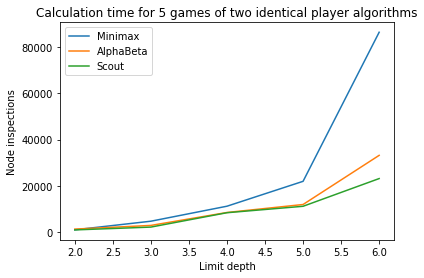

In [127]:
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.title('Calculation time for 5 games of two identical player algorithms')
plt.xlabel('Limit depth')
plt.ylabel('Node inspections')

plt.plot(limits, mini_counts, label="Minimax")
plt.plot(limits, alphabeta_counts, label="AlphaBeta")
plt.plot(limits, scout_counts, label="Scout")

plt.legend(loc='upper left', frameon=True)

# Diagramm anzeigen:
plt.show()

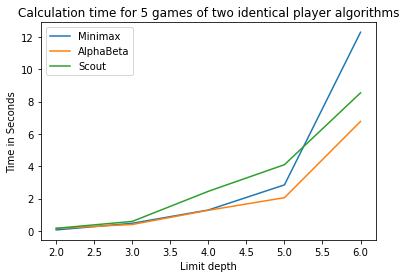

In [128]:
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.title('Calculation time for 5 games of two identical player algorithms')
plt.xlabel('Limit depth')
plt.ylabel('Time in Seconds')

plt.plot(limits, mini_times, label="Minimax")
plt.plot(limits, alphabeta_times, label="AlphaBeta")
plt.plot(limits, scout_times, label="Scout")

plt.legend(loc='upper left', frameon=True)

# Diagramm anzeigen:
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b91c3ea7-d814-439b-837a-72fdc90697b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>